### Exercise 1 (4 Points):

##### Use our toy data set to train a Logistic Regression and a Random Forest model (use the `totalAmount` and the `cartItem` features). Predict on the test data and use the results to plot a ROC curve for each classifier, like shown here (https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics). Plot the two curves in one plot and also show the area-under-curve for each curve in the plot. Use the sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) library for this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
transactions = pd.read_csv('data/data.csv')
from sklearn import preprocessing

transactions = transactions.assign(norm_Amount=preprocessing.normalize([transactions.totalAmount]).transpose())
transactions = transactions.assign(norm_c_0=preprocessing.normalize([transactions.c_0]).transpose())
transactions = transactions.assign(norm_c_1=preprocessing.normalize([transactions.c_1]).transpose())
transactions = transactions.assign(norm_c_2=preprocessing.normalize([transactions.c_2]).transpose())
transactions = transactions.assign(norm_c_3=preprocessing.normalize([transactions.c_3]).transpose())
transactions = transactions.assign(norm_c_4=preprocessing.normalize([transactions.c_4]).transpose())
transactions = transactions.assign(norm_c_5=preprocessing.normalize([transactions.c_5]).transpose())

transactions = transactions.drop(['Unnamed: 0','totalAmount','c_0','c_1','c_2','c_3','c_4','c_5'], axis=1)

transactions = transactions[['norm_Amount', 'norm_c_0', 'norm_c_1', 'norm_c_2', 'norm_c_3', 'norm_c_4', 'norm_c_5', 'returnLabel']]
transactions.head()

,norm_Amount,norm_c_0,norm_c_1,norm_c_2,norm_c_3,norm_c_4,norm_c_5,returnLabel
0,0.004322,0.004696,0.000000,0.014315,0.004613,0.013428,0.000000,0
1,0.001423,0.000000,0.000000,0.004772,0.000000,0.000000,0.000000,0
2,0.000432,0.000000,0.000000,0.004772,0.004613,0.000000,0.000000,0
3,0.009077,0.000000,0.014256,0.000000,0.000000,0.004476,0.009555,0
4,0.003422,0.004696,0.000000,0.004772,0.004613,0.008952,0.000000,0


In [3]:
from sklearn.model_selection import train_test_split

X = transactions.drop('returnLabel',axis=1)
y = transactions.returnLabel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(solver='lbfgs')
reg_model.fit(X_train, y_train)

reg_probs = reg_model.predict_proba(X_test)
reg_probs = reg_probs[:, 1]

In [4]:
from sklearn.ensemble import RandomForestClassifier

for_model = RandomForestClassifier(n_estimators=100)
for_model.fit(X_train, y_train)

for_probs = for_model.predict_proba(X_test)
for_probs = for_probs[:, 1]

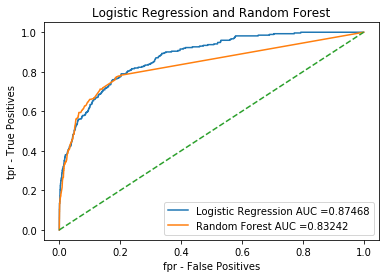

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
reg_auc = roc_auc_score(y_test, reg_probs)
for_auc = roc_auc_score(y_test, for_probs)
# calculate roc curve
reg_fpr, reg_tpr, thresholds = roc_curve(y_test, reg_probs)
for_fpr, for_tpr, thresholds = roc_curve(y_test, for_probs)

# plot the roc curve for the model
plt.plot(reg_fpr, reg_tpr, for_fpr, for_tpr)
plt.plot([0, 1], [0, 1], linestyle='--')


plt.legend(['Logistic Regression AUC ='+str(round(reg_auc,5)), 'Random Forest AUC ='+str(round(for_auc,5))], loc='best')
# naming the axes 
plt.xlabel('fpr - False Positives') 
plt.ylabel('tpr - True Positives') 
  
plt.title('Logistic Regression and Random Forest') 


# show the plot
plt.show()